In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv')

In [55]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [118]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [120]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [122]:
df['total_bedrooms'].fillna(280.0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19048\2974880354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(280.0, inplace=True)


In [124]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [126]:
df.shape


(20640, 9)

In [128]:
df.drop (columns=['ocean_proximity'],axis=1, inplace=True)

KeyError: "['ocean_proximity'] not found in axis"

In [ ]:
df.head()

# train ,test, split

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X.head()

In [ ]:
y = df.iloc[:,-1]

In [ ]:
y.head()

In [138]:
X_train,X_test,y_trian,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [140]:
X_train.shape

(16512, 8)

In [142]:
y_trian.shape

(16512,)

In [144]:
y_test.shape

(4128,)

In [146]:
X_test.shape

(4128, 8)

# feature scalling

In [149]:
scalar = StandardScaler()

In [151]:
X_train_scaled = scalar.fit_transform(X_train)

In [153]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [155]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [157]:
X_test_scaled = scalar.transform(X_test)

In [159]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.03030109,
        -0.37008673, -1.15508475],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.12185077,
         0.220532  , -0.70865905],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.10241931,
         1.21539643, -0.21040155],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.13944058,
         0.17853244,  2.80902421],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.17541702,
        -0.06821494, -0.57542978],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.21507676,
        -0.13646421, -0.17259111]])

# build model 

In [162]:
model = LinearRegression()

In [164]:
model.fit(X_train_scaled, y_trian)

LinearRegression()

In [182]:
y_pred = model.predict(X_test_scaled)

In [184]:
y_pred

array([ 45716.2715471 , 136324.27452781, 235052.87449613, ...,
       439178.19697502, 130408.85287046, 175272.25192552])

# model performance 

In [186]:
mse = mean_squared_error(y_test, y_pred)

In [188]:
mse

5097528478.380106

In [190]:
r2 = r2_score(y_test,y_pred)

In [192]:
r2 # accuracy of liner regression 

0.6109971342517009

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

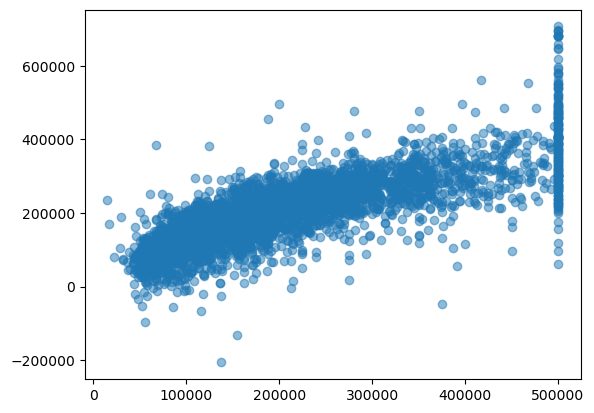

In [200]:
plt.scatter(y_test, y_pred , alpha=0.5)
plt.xlable('Actual House Prices')
plt.ylabel ('Predicted House Prices')
plt.tittle('Actual vs predcted')
plt.show()